In [28]:
from PIL import Image, ImageFilter
import numpy as np

def normalize_channel(channel):
    channel_min = np.min(channel)
    channel_max = np.max(channel)
    normalized_channel = (channel - channel_min) / (channel_max - channel_min) * 255
    return normalized_channel.astype(np.uint8)

def remove_shadows(image):
    # Convert the image to LAB color space
    lab = image.convert('LAB')

    # Split the LAB image into L, A, and B channels
    l, a, b = lab.split()

    # Apply adaptive thresholding on the L channel to separate shadows
    shadow_mask = l.point(lambda x: 0 if x < 127 else 255, mode='1')

    # Apply morphological operations to refine the shadow mask
    filtersize_in_percent = 7
    shadow_mask = shadow_mask.filter(ImageFilter.MedianFilter(size=np.round(image.size[0] * filtersize_in_percent / 100).astype(int)))
    shadow_mask = shadow_mask.filter(ImageFilter.MinFilter(size=np.round(image.size[0] * filtersize_in_percent / 100).astype(int)))
    shadow_mask = shadow_mask.filter(ImageFilter.MaxFilter(size=np.round(image.size[0] * filtersize_in_percent / 100).astype(int)))

    # Normalize the A and B channels
    a_array = np.array(a)
    b_array = np.array(b)

    a_norm = Image.fromarray(normalize_channel(a_array))
    b_norm = Image.fromarray(normalize_channel(b_array))

    # Apply the shadow mask to the normalized A and B channels
    a_pixels = np.array(a_norm)
    b_pixels = np.array(b_norm)
    mask_pixels = np.array(shadow_mask)

    a_pixels[mask_pixels > 0] = np.mean(a_pixels[mask_pixels > 0])
    b_pixels[mask_pixels > 0] = np.mean(b_pixels[mask_pixels > 0])

    a_norm = Image.fromarray(np.uint8(a_pixels))
    b_norm = Image.fromarray(np.uint8(b_pixels))

    # Merge the updated A and B channels with the original L channel
    lab_adjusted = Image.merge('LAB', (l, a_norm, b_norm))

    # Convert the LAB image back to RGB color space
    output = lab_adjusted.convert('RGB')

    return output



In [34]:
from PIL import Image

def calculate_ndvi(image):
    # Convert the image to RGB mode
    rgb_image = image.convert('RGB')

    # Split the RGB image into red, green, and blue bands
    r, g, b = rgb_image.split()

    # Convert the bands to numpy arrays
    r_array = np.array(r)
    g_array = np.array(g)
    b_array = np.array(b)

    # Calculate NDVI
    ndvi = (g_array - r_array) / (g_array + r_array + 1e-8)

    # Normalize NDVI to the range of 0-255
    ndvi_normalized = (ndvi + 1) * 127.5

    # Create a new grayscale image from the normalized NDVI array
    ndvi_image = Image.fromarray(ndvi_normalized.astype(np.uint8))

    return ndvi_image

def calculate_evi(image):
    # Convert the image to RGB mode
    rgb_image = image.convert('RGB')

    # Split the RGB image into red, green, and blue bands
    r, g, b = rgb_image.split()

    # Convert the bands to numpy arrays
    r_array = np.array(r)
    g_array = np.array(g)
    b_array = np.array(b)

    # Calculate EVI
    evi = 2.5 * (g_array - r_array) / (g_array + 6 * r_array - 7.5 * b_array + 1)

    # Normalize EVI to the range of 0-255
    evi_normalized = (evi + 1) * 127.5

    # Create a new grayscale image from the normalized EVI array
    evi_image = Image.fromarray(evi_normalized.astype(np.uint8))

    return evi_image

def calculate_gndvi(image):
    # Convert the image to RGB mode
    rgb_image = image.convert('RGB')

    # Split the RGB image into red, green, and blue bands
    r, g, b = rgb_image.split()

    # Convert the bands to numpy arrays
    r_array = np.array(r)
    g_array = np.array(g)

    # Calculate GNDVI
    gndvi = (g_array - r_array) / (g_array + r_array)

    # Normalize GNDVI to the range of 0-255
    gndvi_normalized = (gndvi + 1) * 127.5

    # Create a new grayscale image from the normalized GNDVI array
    gndvi_image = Image.fromarray(gndvi_normalized.astype(np.uint8))

    return gndvi_image



In [37]:
#Load a image in PIL

image = Image.open('../grid/grid_0_7000_500_500.png', formats=['png'])

removed = calculate_evi(image)

/tmp/ipykernel_917/2625976316.py:41: RuntimeWarning: divide by zero encountered in divide
  evi = 2.5 * (g_array - r_array) / (g_array + 6 * r_array - 7.5 * b_array + 1)
/tmp/ipykernel_917/2625976316.py:41: RuntimeWarning: invalid value encountered in divide
  evi = 2.5 * (g_array - r_array) / (g_array + 6 * r_array - 7.5 * b_array + 1)
/tmp/ipykernel_917/2625976316.py:47: RuntimeWarning: invalid value encountered in cast
  evi_image = Image.fromarray(evi_normalized.astype(np.uint8))


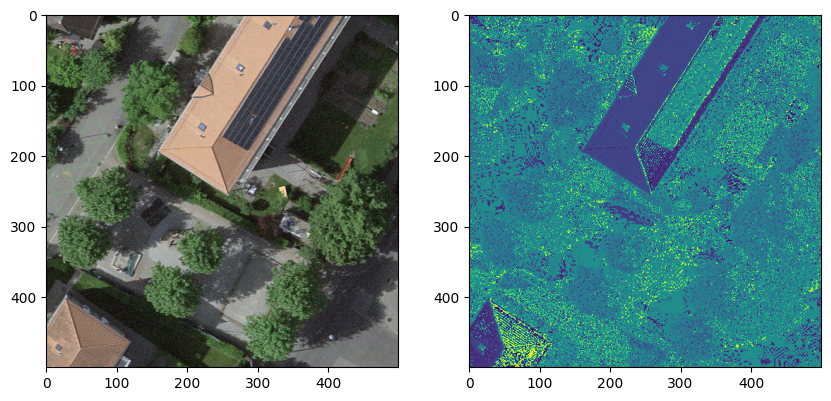

In [38]:
import matplotlib.pyplot as plt

# Plot the two images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image)
ax[1].imshow(removed)
plt.show()